In [16]:
# importing all required library
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist


In [8]:
# load the Fashion MNIST dataset (open source dataset)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize the pixel values to the range [0, 1] (in second experiment added this normalization)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape the data for CNN input
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (10000, 28, 28, 1)

# one-hot encode the labels for multi-class classification
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [9]:
# model architechture (final architecture after few experiment)
def build_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model


In [10]:
model = build_model()
# compling model with adam optimizer and passing learning rate with loss function and metrics
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# train the model with 80% train 20% validation data with callbacks
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 182ms/step - accuracy: 0.7125 - loss: 0.8538 - val_accuracy: 0.8723 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 180ms/step - accuracy: 0.8619 - loss: 0.3931 - val_accuracy: 0.8928 - val_loss: 0.2928 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 186ms/step - accuracy: 0.8831 - loss: 0.3285 - val_accuracy: 0.9031 - val_loss: 0.2684 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 184ms/step - accuracy: 0.8929 - loss: 0.3007 - val_accuracy: 0.9031 - val_loss: 0.2627 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 144s 188ms/step - accuracy: 0.9026 - loss: 0.2722 - val_accuracy: 0.9161 - val_loss: 0.2307 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 187ms/step - accuracy: 0.9058 - loss: 0.2638 - val_accuracy: 0.9111 - val_loss: 0.2403 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 183ms/step - accura

In [12]:
# evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 6s - 19ms/step - accuracy: 0.9310 - loss: 0.2029
Test Accuracy: 0.9310


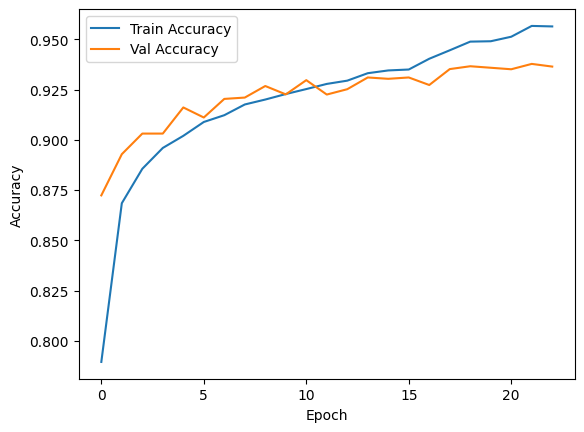

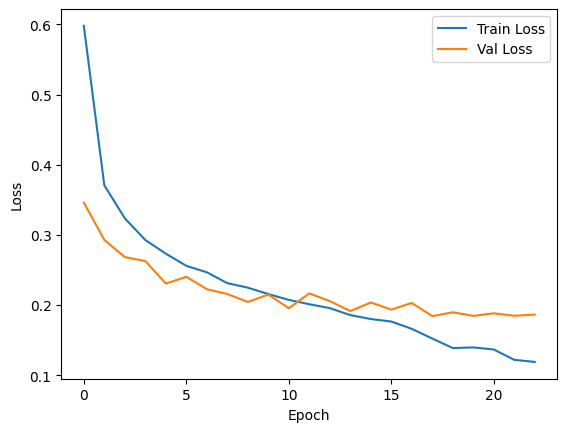

In [13]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


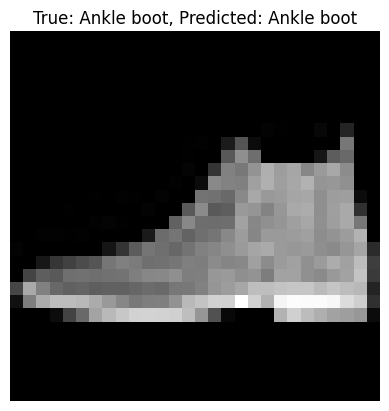

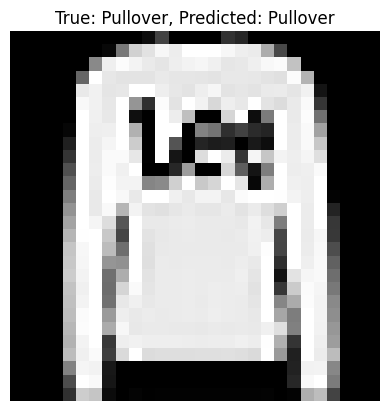

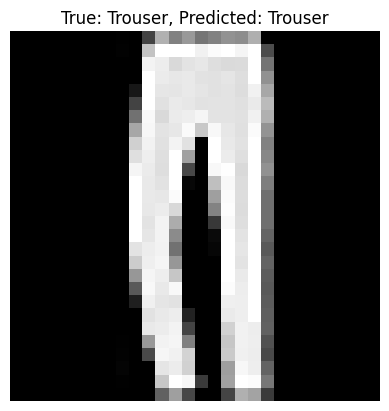

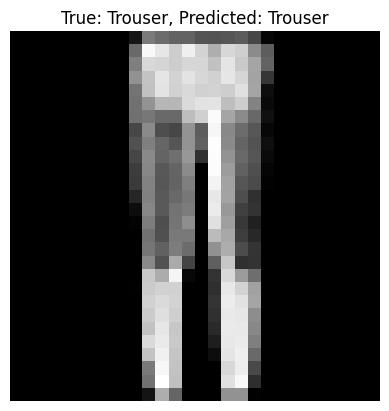

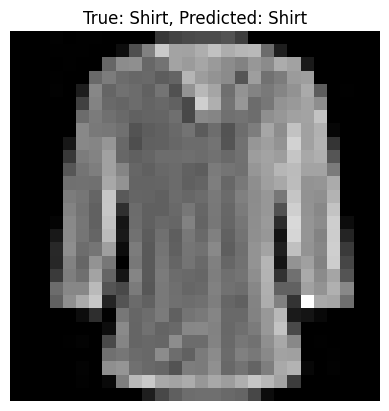

In [15]:
# fasion mnist data classes list
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# make predictions on test data
predictions = model.predict(x_test)

# get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)


# convert one-hot encoded y_test back to class indices to get true labels
true_labels = np.argmax(y_test, axis=1)

for i in range(5):  # show 5 examples with true label and predicted label
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_name = class_names[predicted_labels[i]]
    true_name = class_names[true_labels[i]]
    plt.title(f"True: {true_name}, Predicted: {predicted_name}")
    plt.axis('off')
    plt.show()